Api_Analysis_notebook

- import all the required libraries

In [1]:
import requests
import json
import pandas as pd
import matplotlib as plt

- Enter your user name and API key

In [2]:
USER = "admin"
API_KEY = "123"

- the below function is used to fetch the data from the weather api using the flask endpoint api

In [11]:
place_list= {}

In [3]:
def weather_call(place):
    """weather api call to request json data from the flask end point

    Args:
        place (string): the palce entered by the user for the weather loation detection

    Returns:
        dictionary:  the response data in form of dictionary from the request fetch
    """
    # creates the json data to send to the api
    data = json.dumps({"user": USER, "api-key": API_KEY, "place": place})
    # try fetching the response
    try:
        response = requests.get("http://127.0.0.1:45000/", json=data)
    except Exception as e:
        print("Unable to connect to flask api")
        return False
    # if the response is received
    if response.ok:
        # get the json from response
        dictionary = response.json()
        if dictionary["status"] == "false":
            print(dictionary["reason"])
            return False
        # add a parameter in case for ordering
        dictionary["s.no"] = len(place_list)
        place_list[dictionary["area_name"]] = dictionary
        print("Successfully fetched the data try the response statement")
        return {dictionary["area_name"]: dictionary}
    else:
        print("response not found")
        return False

- the below function is used to get the location in names or in longitude and latitude form with error checks

In [4]:
def get_place():
    """
        the function gets the place from the user in the form of name or in the latitude and the longitude format.
    Raises:
        TypeError: incase of input other than the specified one in entered

    Returns:
        string: the user entered location or coordinates
    """
    while True:
        # try getting the data in which form
        try:
            n = int(
                input(
                    'Do you want to select the place by latitude/longitude(Enter "0") or by entering the place name(Enter "1")?'
                )
            )
            # prompt user incase of invalid input
            if n not in [0, 1]:
                raise TypeError("> Only integers '0' and '1' are allowed")
        except TypeError as e:
            print(e)
            continue
        except:
            print("> Invalid Input Try Again..")
            continue
        else:
            break
    # check if it is in name or coordinates
    if n:
        # returns the input location
        return input("Enter the location").strip()
    else:
        # gets the latitude
        while True:
            try:
                lat = float(input("Enter the latitude of the location: -"))
                # check if they are within range
                if not (-90 <= lat and lat <= 90):
                    raise TypeError("> Enter a valid latitude value..")
            except TypeError as e:
                print(e)
                continue
            except:
                print("> Invalid Input Try Again..")
                continue
            else:
                break
        # gets the longitude
        while True:
            try:
                lon = float(input("Enter the longitude of the location: -"))
                # check if they are within range
                if not (-180 <= lon and lon < 180):
                    raise TypeError("> Enter a valid longitude value..")
            except TypeError as e:
                print(e)
                continue
            except:
                print("> Invalid Input Try Again..")
                continue
            else:
                break
        #returns the fetched coordinates
        return f"{str(lat)},{str(lon)}"

- the below code is for testing of the above function

In [6]:
get_place()

> Invalid Input Try Again..
> Invalid Input Try Again..
> Enter a valid longitude value..


'45.0,45.0'

- the below code is to fetch the weather data

In [12]:
# run to get the flask api response on place
print("enter location")
response = weather_call(get_place())

enter location
Successfully fetched the data try the response statement


- if the response is received then add the data to the dataframe

In [17]:
if response:
    place_dataframe = pd.DataFrame(response)

- print the place_list list of values

In [18]:
place_list

{'Chennai': {'status': 'true',
  'user': 'admin',
  'api-key': '123',
  'place': 'chennai',
  'area_name': 'Chennai',
  'country': 'India',
  'latitude': '13.083',
  'longitude': '80.283',
  'population': '4328063',
  'region': 'Tamil Nadu',
  'feels_like_c': '35',
  'feels_like_f': '96',
  'cloudcover': '25',
  'humidity': '30',
  'local_obs_date_time': '2023-03-02 01:55 PM',
  'observation_time': '08:25 AM',
  'precip_inches': '0.0',
  'precip_mm': '0.0',
  'pressure': '1016',
  'pressure_inches': '30',
  'temp_c': '33',
  'temp_f': '91',
  'uv_index': '8',
  'visibility': '7',
  'visibility_miles': '4',
  'weather_code': '116',
  'weather_desc': 'Partly cloudy',
  'winddir16_point': 'E',
  'winddir_degree': '100',
  'windspeed_kmph': '24',
  'windspeed_miles': '15',
  's.no': 0},
 'New Delhi': {'status': 'true',
  'user': 'admin',
  'api-key': '123',
  'place': 'delhi',
  'area_name': 'New Delhi',
  'country': 'India',
  'latitude': '28.600',
  'longitude': '77.200',
  'population':

- print the place_dataframe which the responses have been added

In [25]:
place_dataframe

,Chennai,Vijayawada,Bombay
api-key,123,123,123
area_name,Chennai,Vijayawada,Bombay
cloudcover,25,0,0
country,India,India,India
feels_like_c,26,26,25
feels_like_f,78,78,77
humidity,89,79,39
latitude,13.083,16.517,18.975
local_obs_date_time,2023-02-28 07:09 AM,2023-02-28 09:20 AM,2023-02-28 07:54 AM
longitude,80.283,80.617,72.826


- get the data of weather of some few cities

In [16]:
recent_fetch = weather_call(get_place())

Successfully fetched the data try the response statement


- add them to the dataframe if you want to compare

In [20]:
try:
    place_dataframe = pd.concat([place_dataframe, pd.DataFrame(recent_fetch)], axis=1)
except:
    print("unable to append to list")

- save the place_dataframe data to json in case you dont want to lose the fetched weather data

In [ ]:
# save data_frame to json
place_dataframe.to_json("place_dataframe.json")

- load the saved json data into the place_dataframe 

In [24]:
# retrieve data_frame from json
place_dataframe = pd.read_json("place_dataframe.json")

- transpose the place_dataframe to perform various opration and plotting purposes
- and print the data of the transposed dataframe

In [26]:
place_dataframe_transpose = place_dataframe.T
place_dataframe_transpose = place_dataframe.T[["temp_c", "humidity"]]
place_dataframe_transpose

,temp_c,humidity
Chennai,24,89
Vijayawada,25,79
Bombay,24,39


- plot the data of the transposed dataframe in the desired plotting form

<Axes: >

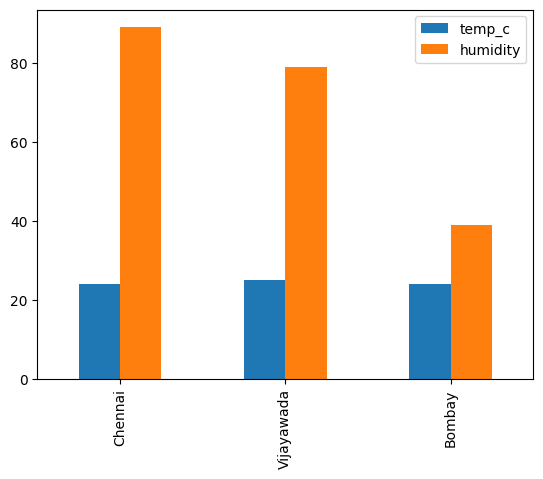

In [27]:
place_dataframe_transpose.astype(str).astype(int).plot.bar()